In [ ]:
# 필요한 package 불러오기

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import display
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest

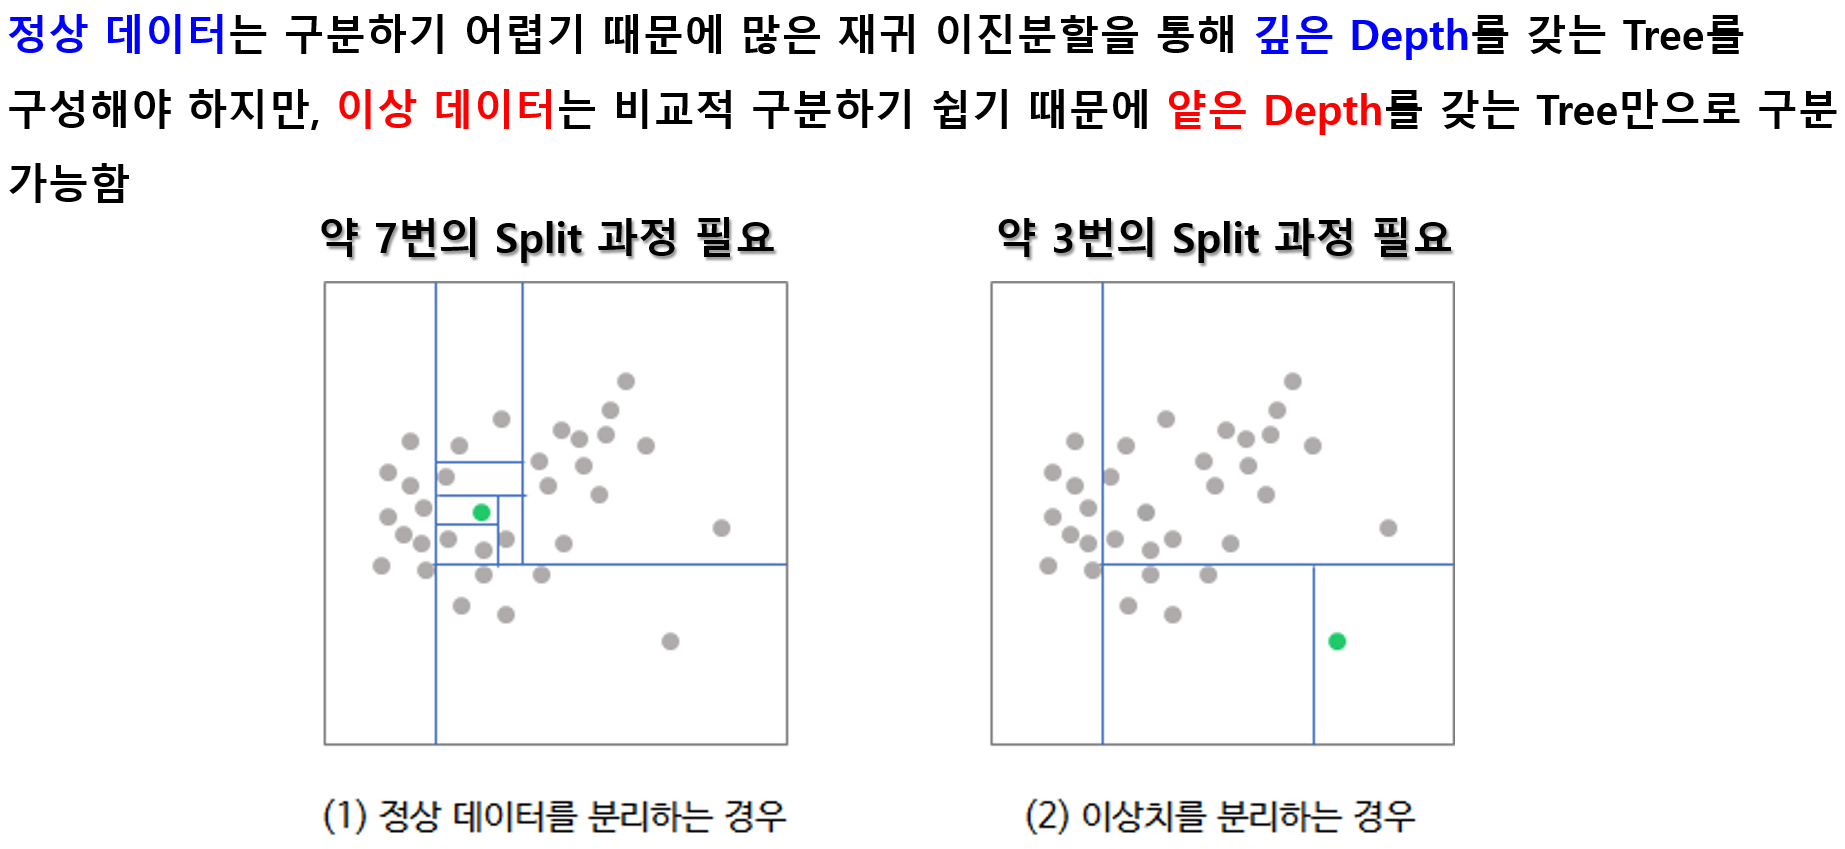

## (1) Anomaly Detection with Isolation Forest

In [ ]:
# colab으로 데이터 업로드
# local data 사용 시, 주석 처리

from google.colab import files
uploaded = files.upload()

Saving Dushanbe_house.csv to Dushanbe_house.csv


In [ ]:
# importing the dataset
# local data 사용 시, path 설정
dataset = pd.read_csv("Dushanbe_house.csv")

# removing the indexed column
dataset.drop('Unnamed: 0', axis=1, inplace=True)
# removing null values
dataset.dropna(inplace=True)
# heading
dataset.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000
5,3,4,53.0,38.530686,68.745261,513000


In [ ]:
# plotting scattered graph
fig = px.scatter(dataset['price'])
fig.show()

In [ ]:
'''
IsolationForest parameter
  - n_estimatorsint: the number of base estimators in the ensemble (default is 100)
  - contamination: a rough estimate of the percentage of the outliers in our dataset
  - bootstrap: (If True,) individual trees are fit on random subsets of the training data sampled with replacement
'''

# initializing the isolation forest
isolation_model = IsolationForest(contamination = 0.003)
# training the model 
isolation_model.fit(dataset)

# making predictions 
IF_predictions = isolation_model.predict(dataset)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [ ]:
# printing
print(IF_predictions)

[1 1 1 ... 1 1 1]


In [ ]:
# adding the anomalies to the dataset 
dataset['anomalies'] = IF_predictions

'''
dataset.query('anomalies == -1') is same to dataset[dataset['anomalies] == -1] 
'''
anomalies = dataset.query('anomalies == -1')
anomalies

,number_of_rooms,floor,area,latitude,longitude,price,anomalies
401,6,9,357.0,38.523459,68.749516,3420000,-1
467,3,19,298.0,38.584950,68.763487,1865000,-1
1249,6,4,330.0,38.562076,68.798406,3000000,-1
1677,6,8,226.0,38.550716,68.830547,1654320,-1
2206,6,9,320.0,38.523459,68.749516,3648000,-1
2707,4,3,267.0,38.573671,68.794877,4900000,-1
2717,6,9,370.0,38.615876,68.781799,3400000,-1
3545,5,15,255.0,38.561506,68.739065,2950000,-1
3669,6,11,320.0,38.523459,68.749516,1490000,-1
4283,4,17,277.0,38.550716,68.830547,1200000,-1


In [ ]:
# plotting the graph for outliers
normal = go.Scatter(x=dataset.index.astype(str), y=dataset['price'], name="Dataset", mode='markers')
outlier = go.Scatter(x=anomalies.index.astype(str), y=anomalies['price'], name="Anomalies", mode='markers',
                marker=dict(color='red', size=6, line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest", yaxis_title='Price', xaxis_title='x-axis',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

## (2) Classification with Isolation Forest

In [ ]:
!git clone https://github.com/KU-DIC/LG_time_series_day14.git

Cloning into 'LG_time_series_day14'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), 7.45 MiB | 4.22 MiB/s, done.


In [ ]:
# load the dataset (github dataset)
df = pd.read_csv("/content/LG_time_series_day14/sensor-filtered.csv")
df.head(3)

,timestamp,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,machine_status
0,2018-04-01 00:00:00,634.3750,13.41146,16.13136,15.56713,15.05353,0
1,2018-04-01 00:01:00,634.3750,13.41146,16.13136,15.56713,15.05353,0
2,2018-04-01 00:02:00,638.8889,13.32465,16.03733,15.61777,15.01013,0


In [ ]:
# anomalies
broken = df[df['machine_status']==1]
broken.head(10)

,timestamp,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,machine_status
17155,2018-04-12 21:55:00,202.526031,3.219039,16.89091,16.869210,15.082470,1
17156,2018-04-12 21:56:00,204.725098,3.045428,17.42621,15.740740,16.174770,1
17157,2018-04-12 21:57:00,201.137131,7.537616,13.53443,9.324364,16.051790,1
17158,2018-04-12 21:58:00,204.030655,7.609953,16.60880,16.203700,16.095200,1
17159,2018-04-12 21:59:00,203.567688,7.573785,16.70284,16.160300,16.087960,1
17160,2018-04-12 22:00:00,203.567688,7.559317,16.56539,16.239870,16.051790,1
17161,2018-04-12 22:01:00,203.567688,7.559317,16.56539,16.239870,16.051790,1
17162,2018-04-12 22:02:00,202.988983,7.537616,16.56539,16.160300,16.095200,1
17163,2018-04-12 22:03:00,201.947327,3.920717,16.52199,16.030090,16.095196,1
17164,2018-04-12 22:04:00,201.252869,6.510417,16.70284,15.950520,16.095200,1


In [ ]:
# Continuous columns filtering
df2 = df.drop(['machine_status'], axis=1)
df2.head(10)

,timestamp,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09
0,2018-04-01 00:00:00,634.3750,13.41146,16.13136,15.56713,15.05353
1,2018-04-01 00:01:00,634.3750,13.41146,16.13136,15.56713,15.05353
2,2018-04-01 00:02:00,638.8889,13.32465,16.03733,15.61777,15.01013
3,2018-04-01 00:03:00,628.1250,13.31742,16.24711,15.69734,15.08247
4,2018-04-01 00:04:00,636.4583,13.35359,16.21094,15.69734,15.08247
5,2018-04-01 00:05:00,637.6157,13.41146,16.16753,15.89265,15.16204
6,2018-04-01 00:06:00,633.3333,13.43316,16.13136,15.65393,15.08247
7,2018-04-01 00:07:00,630.6713,13.25231,16.12413,16.19647,15.08247
8,2018-04-01 00:08:00,631.9444,13.28848,16.13136,15.47309,15.11863
9,2018-04-01 00:09:00,641.7823,13.38252,16.24711,15.61777,15.11863


In [ ]:
names = df2.iloc[:,1:].columns
names

Index(['sensor_04', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09'], dtype='object')

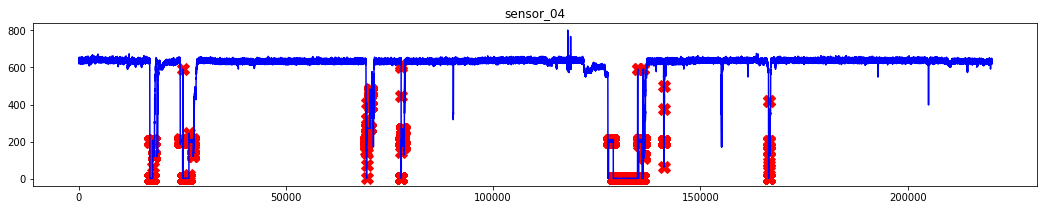

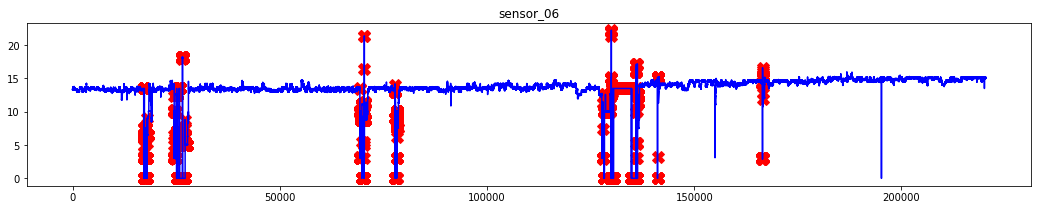

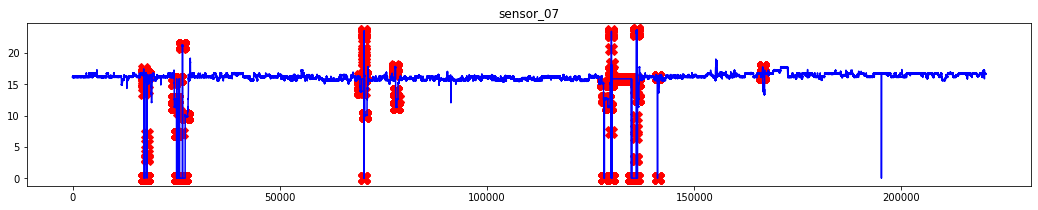

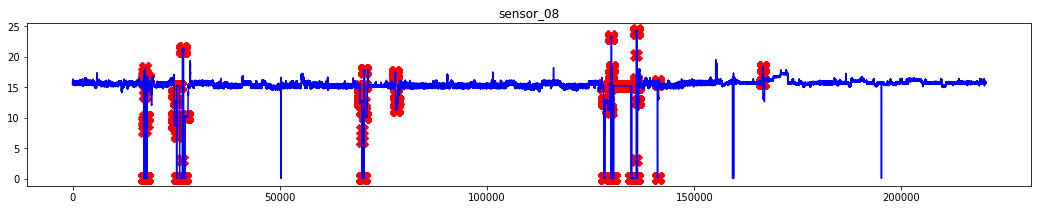

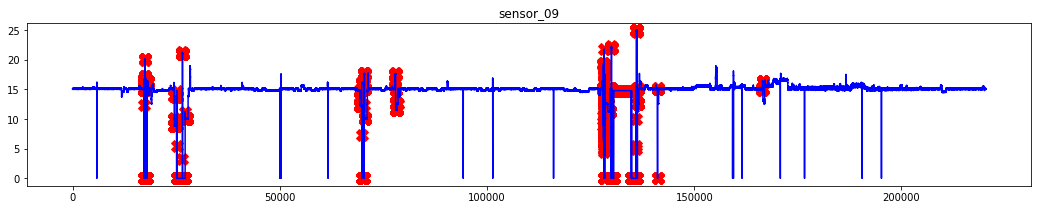

In [ ]:
# 빨간색으로 X로 표시된 BROKEN 상태의 각 센서에 대한 시계열 플롯
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

In [ ]:
# Data normalization from standard scaler
df2 = df.drop(['machine_status'], axis=1) # X
names = df2.iloc[:,1:].columns
x = df[names]

In [ ]:
# Data standardization
scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.303443  , -0.04209145,  0.13258569,  0.18196391,  0.12285839],
       [ 0.303443  , -0.04209145,  0.13258569,  0.18196391,  0.12285839],
       [ 0.33478575, -0.08265609,  0.08932864,  0.20711247,  0.1018925 ],
       ...,
       [ 0.2447758 ,  0.74211773,  0.39548621,  0.24662809,  0.15430723],
       [ 0.3122829 ,  0.75563616,  0.33225446,  0.26818117,  0.15430723],
       [ 0.34121483,  0.75563616,  0.37219006,  0.22507006,  0.1018925 ]])

In [ ]:
# outlier fraction check
ture_anomaly_proportion = df['machine_status'].value_counts()[1] / sum(df['machine_status'].value_counts())
print(ture_anomaly_proportion)

# Assume that 6.5% of the entire data set are anomalies 
outliers_fraction = 0.06574

0.06574074074074074


In [ ]:
!pip install adtk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 KB 2.4 MB/s eta 0:00:00


In [ ]:
from adtk.visualization import plot

# Isolation Forest model define & train

model =  IsolationForest(contamination = outliers_fraction, n_estimators=150)
model.fit(x)

IsolationForest(contamination=0.06574, n_estimators=150)

In [ ]:
# anomaly score 계산
scores = model.score_samples(x)
scores

array([-0.33419507, -0.33419507, -0.34577925, ..., -0.38205515,
       -0.3706433 , -0.37728178])

In [ ]:
df['anomaly_scores'] = model.score_samples(x)
df['anomaly_scores']

0        -0.334195
1        -0.334195
2        -0.345779
3        -0.340964
4        -0.340982
            ...   
220315   -0.368400
220316   -0.378424
220317   -0.382055
220318   -0.370643
220319   -0.377282
Name: anomaly_scores, Length: 220320, dtype: float64

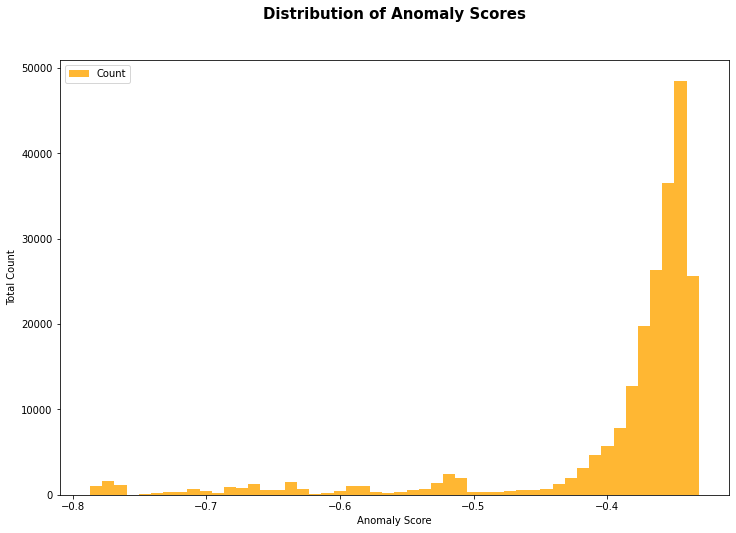

In [ ]:
#Total number of bins can be adjusted to understand the visualization better
total_bins = 50
fig = plt.figure()

#Setting width and height 
fig.set_figwidth(12)
fig.set_figheight(8)

#The data, bins and patches for the histogram
n, bins, patches = plt.hist(scores, total_bins, color = "orange", alpha = 0.8)

#Setting labels, titles and legends
plt.xlabel('Anomaly Score')
plt.ylabel('Total Count')
plt.title('Distribution of Anomaly Scores\n\n',
          fontweight ="bold",fontsize = 15)
plt.legend(["Count"])
plt.show()

In [ ]:
df['anomaly_classification'] = model.predict(x)
df['anomaly_classification'] = df['anomaly_classification'].replace(1, 0)
df['anomaly_classification'] = df['anomaly_classification'].replace(-1, 1)
df['anomaly_classification']

0         0
1         0
2         0
3         0
4         0
         ..
220315    0
220316    0
220317    0
220318    0
220319    0
Name: anomaly_classification, Length: 220320, dtype: int64

In [ ]:
df['anomaly_classification'].value_counts()

0    205836
1     14484
Name: anomaly_classification, dtype: int64

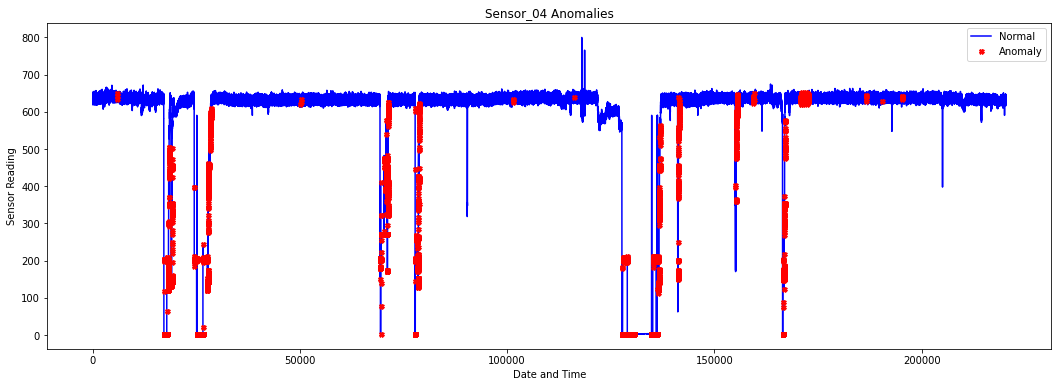

In [ ]:
# visualization (Isolation Forest 모델링 결과 이상치로 분류된 instance)
a = df.loc[df['anomaly_classification'] == 1] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=5, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show()

In [ ]:
# performance check
result = classification_report(df['machine_status'], df['anomaly_classification'])
print(result)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    205836
           1       0.67      0.67      0.67     14484

    accuracy                           0.96    220320
   macro avg       0.82      0.82      0.82    220320
weighted avg       0.96      0.96      0.96    220320

